# 🚀 **Momentum and Nesterov Accelerated Gradient (NAG)**

In this notebook, we extend **Gradient Descent** by introducing **momentum-based optimizers** — algorithms that improve **convergence speed** and **stability** by incorporating *past gradient information*.

This notebook covers:
- ⚙️ The motivation for momentum
- 🧮 The mathematical formulation
- 📈 Visual comparison of vanilla GD vs. Momentum vs. NAG
- 💡 Intuitive geometric and physical analogies

---

### 🧭 References

1. Polyak, B. T. (1964). *Some methods of speeding up the convergence of iteration methods*. USSR Computational Mathematics and Mathematical Physics, 4(5):1–17.  
2. Nesterov, Y. (1983). *A method of solving a convex programming problem with convergence rate O(1/k²)*. Soviet Mathematics Doklady, 27(2):372–376.  
3. Sutskever, I., et al. (2013). *On the importance of initialization and momentum in deep learning*. ICML.  
4. Goodfellow, Bengio, Courville (2016). *Deep Learning* — Chapter 8: Optimization for Training Deep Models.

---


## 🌊 Why Momentum?

Imagine rolling a ball down a valley.  
In plain Gradient Descent, the ball stops frequently — it only moves in the direction of the current slope.  
Momentum allows the ball to **build velocity**, smoothing its trajectory and helping it **escape small local minima**.

---

### 🧩 Problem with Vanilla Gradient Descent

- Slow convergence in ravines (areas where the surface curves more steeply in one dimension than another).  
- Zig-zagging behavior along narrow valleys.  

Momentum solves this by accumulating **an exponentially decaying moving average** of past gradients.

---

## 🧮 Mathematical Formulation

### 🔹 Momentum Update Rule

$$
v_t = \beta v_{t-1} + (1 - \beta)\nabla_\theta L(\theta_t)
$$
$$
\theta_{t+1} = \theta_t - \eta v_t
$$

where:
- $ \beta \in [0,1) $: momentum coefficient (typically 0.9)
- $ v_t $: velocity term (exponentially averaged gradient)
- $ \eta $: learning rate

---

### 🔹 Nesterov Accelerated Gradient (NAG)

Unlike standard momentum, NAG looks **ahead** before computing the gradient:

$$
v_t = \beta v_{t-1} + \nabla_\theta L(\theta_t - \eta \beta v_{t-1})
$$
$$
\theta_{t+1} = \theta_t - \eta v_t
$$

This anticipatory step provides better curvature awareness and often yields **faster convergence**.

---

### 🧠 Intuition

- **Momentum:** remembers previous directions → smoother convergence  
- **NAG:** anticipates the next step → more precise correction  

---


### Step-1: Imports and Environment Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown

### Step-2: Define the Sample Function and its Gradient

In [2]:
# Define a non-isotropic quadratic (narrow valley)
def f(x, y):
    return 0.5 * (x**2 + 10 * y**2)

def grad_f(x, y):
    return np.array([x, 10 * y])

### Step-3: Visualise the Loss Surface

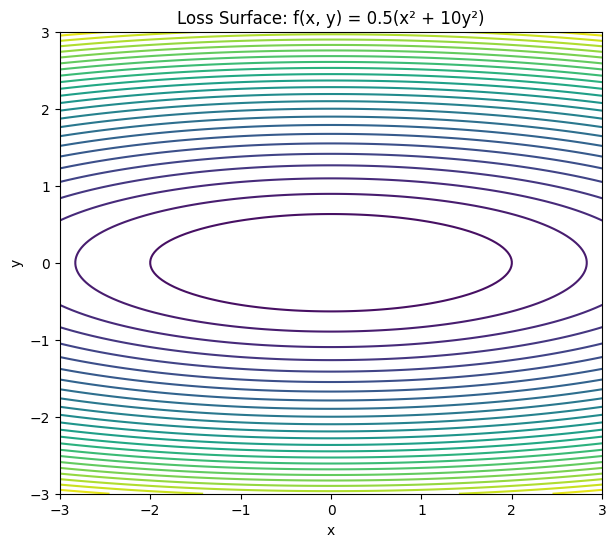

In [3]:
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(7,6))
plt.contour(X, Y, Z, levels=25, cmap='viridis')
plt.title("Loss Surface: f(x, y) = 0.5(x² + 10y²)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Step-4: Gradient Descent, Momentum, and NAG

In [4]:
def gradient_descent(grad, start, lr=0.1, n_iter=30):
    x = start
    path = [x]
    for _ in range(n_iter):
        g = grad(*x)
        x = x - lr * g
        path.append(x)
    return np.array(path)

def momentum(grad, start, lr=0.1, beta=0.9, n_iter=30):
    x = start
    v = np.zeros_like(x)
    path = [x]
    for _ in range(n_iter):
        v = beta * v + (1 - beta) * grad(*x)
        x = x - lr * v
        path.append(x)
    return np.array(path)

def nesterov(grad, start, lr=0.1, beta=0.9, n_iter=30):
    x = start
    v = np.zeros_like(x)
    path = [x]
    for _ in range(n_iter):
        lookahead = x - lr * beta * v
        g = grad(*lookahead)
        v = beta * v + g
        x = x - lr * v
        path.append(x)
    return np.array(path)

### Step-5: Compare each Optimiser

In [5]:
start = np.array([2.5, 2.5])
gd_path = gradient_descent(grad_f, start, lr=0.15)
mom_path = momentum(grad_f, start, lr=0.15, beta=0.9)
nag_path = nesterov(grad_f, start, lr=0.15, beta=0.9)

### Step-6: Visualise the Paths

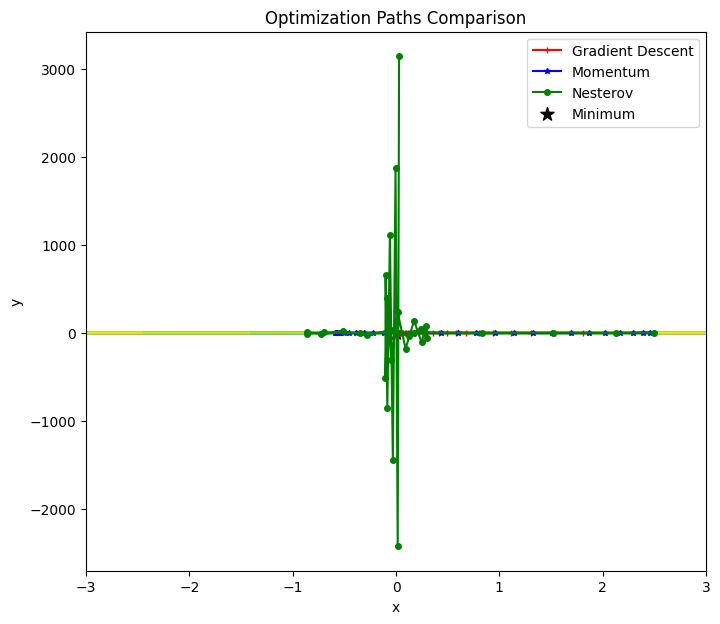

In [6]:
plt.figure(figsize=(8,7))
plt.contour(X, Y, Z, levels=25, cmap='viridis')

plt.plot(gd_path[:,0], gd_path[:,1], 'r-+', markersize=4, label='Gradient Descent')
plt.plot(mom_path[:,0], mom_path[:,1], 'b-*', markersize=4, label='Momentum')
plt.plot(nag_path[:,0], nag_path[:,1], 'g-o', markersize=4, label='Nesterov')

plt.scatter(0, 0, c='black', marker='*', s=100, label='Minimum')
plt.title("Optimization Paths Comparison")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 🔍 Observations

| Optimizer | Behavior | Characteristics |
|------------|-----------|----------------|
| **Gradient Descent** | Zig-zags across narrow valley | Slow convergence |
| **Momentum** | Smooth path with overshoot | Faster convergence along low curvature directions |
| **Nesterov** | Predictive correction before overshoot | Most stable and fastest |

---

Momentum accelerates convergence by *accumulating velocity*.  
Nesterov improves this by *anticipating the future position* before applying the gradient — reducing oscillations and improving efficiency.

---

💡 **Geometric Viewpoint**

Both Momentum and NAG can be interpreted as *discretized versions* of physical dynamics under friction:
$$
m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + \nabla L(x) = 0
$$
where:
- $ m $: mass (inertia)
- $ c $: damping term (controls oscillation)
- $ \nabla L(x) $: force from the loss surface


## 🎛️ Interactive Exploration

Try adjusting the following in the code cells:
- `beta`: momentum coefficient (e.g., 0.5, 0.9, 0.99)
- `lr`: learning rate (e.g., 0.05, 0.15, 0.3)

Observe:
- How larger `beta` values produce **smoother but more oscillatory** motion.  
- How small `beta` values act closer to plain GD.  
- How NAG stabilizes updates for higher `beta` values.

## 📘 Theoretical Notes

### 1️⃣ Convergence Rate
- Gradient Descent: \( O(1/k) \)
- Nesterov Accelerated Gradient: \( O(1/k^2) \) (for convex functions)

### 2️⃣ Relation to Second-Order Methods
Momentum approximates a form of **implicit acceleration** similar to conjugate gradients or quasi-Newton methods — but without computing the Hessian.

### 3️⃣ Deep Learning Implications
In deep learning, momentum helps:
- Escape plateaus in high-dimensional landscapes  
- Stabilize training with large batch sizes  
- Improve generalization (less noisy updates)

---

### 4️⃣ Connection to Continuous-Time Dynamics
In the continuous-time limit, NAG behaves like an **underdamped Hamiltonian system**, linking optimization and physics.

*(See Su, Boyd, & Candes (2016): A Differential Equation for Modeling Nesterov’s Accelerated Gradient)*

---

# ✅ Summary

In this notebook, we:
- Understood **Momentum** and **Nesterov Accelerated Gradient**
- Derived their **update rules**
- Visualized their **optimization paths**
- Explored their **intuitive physical analogies**

---

### 🔮 Next Steps

In the next notebook:
> **Adaptive Optimizers** — Adagrad, RMSProp, Adam  
We’ll explore algorithms that adapt learning rates **per parameter**, combining ideas from momentum and scaling.

---

> “Momentum transforms optimization from cautious descent into elegant motion.”  
> — *Inspired by Polyak (1964)*